#**Decision Tree**

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the Excel file
file_path = r"/content/heart_disease.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure of the file
xls.sheet_names

['Description', 'Heart_disease']

In [2]:
description_df = xls.parse("Description")

description_df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [3]:
heart_disease_df = xls.parse("Heart_disease")

heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
heart_disease_df.shape


(908, 13)

In [5]:
heart_disease_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
heart_disease_df.describe()


,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


<Axes: >

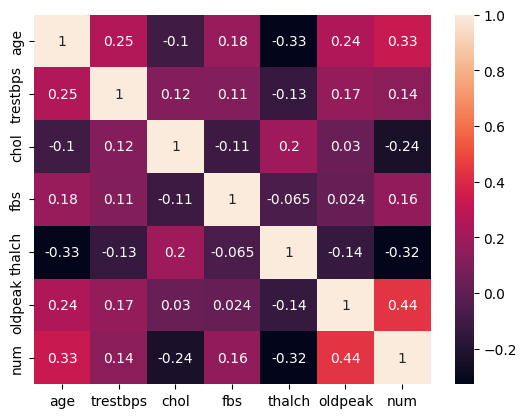

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

z = heart_disease_df.corr(numeric_only=True)

sns.heatmap(z, annot=True)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

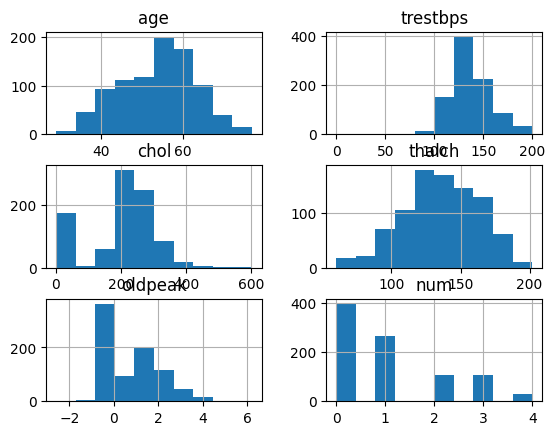

In [8]:
heart_disease_df.hist()


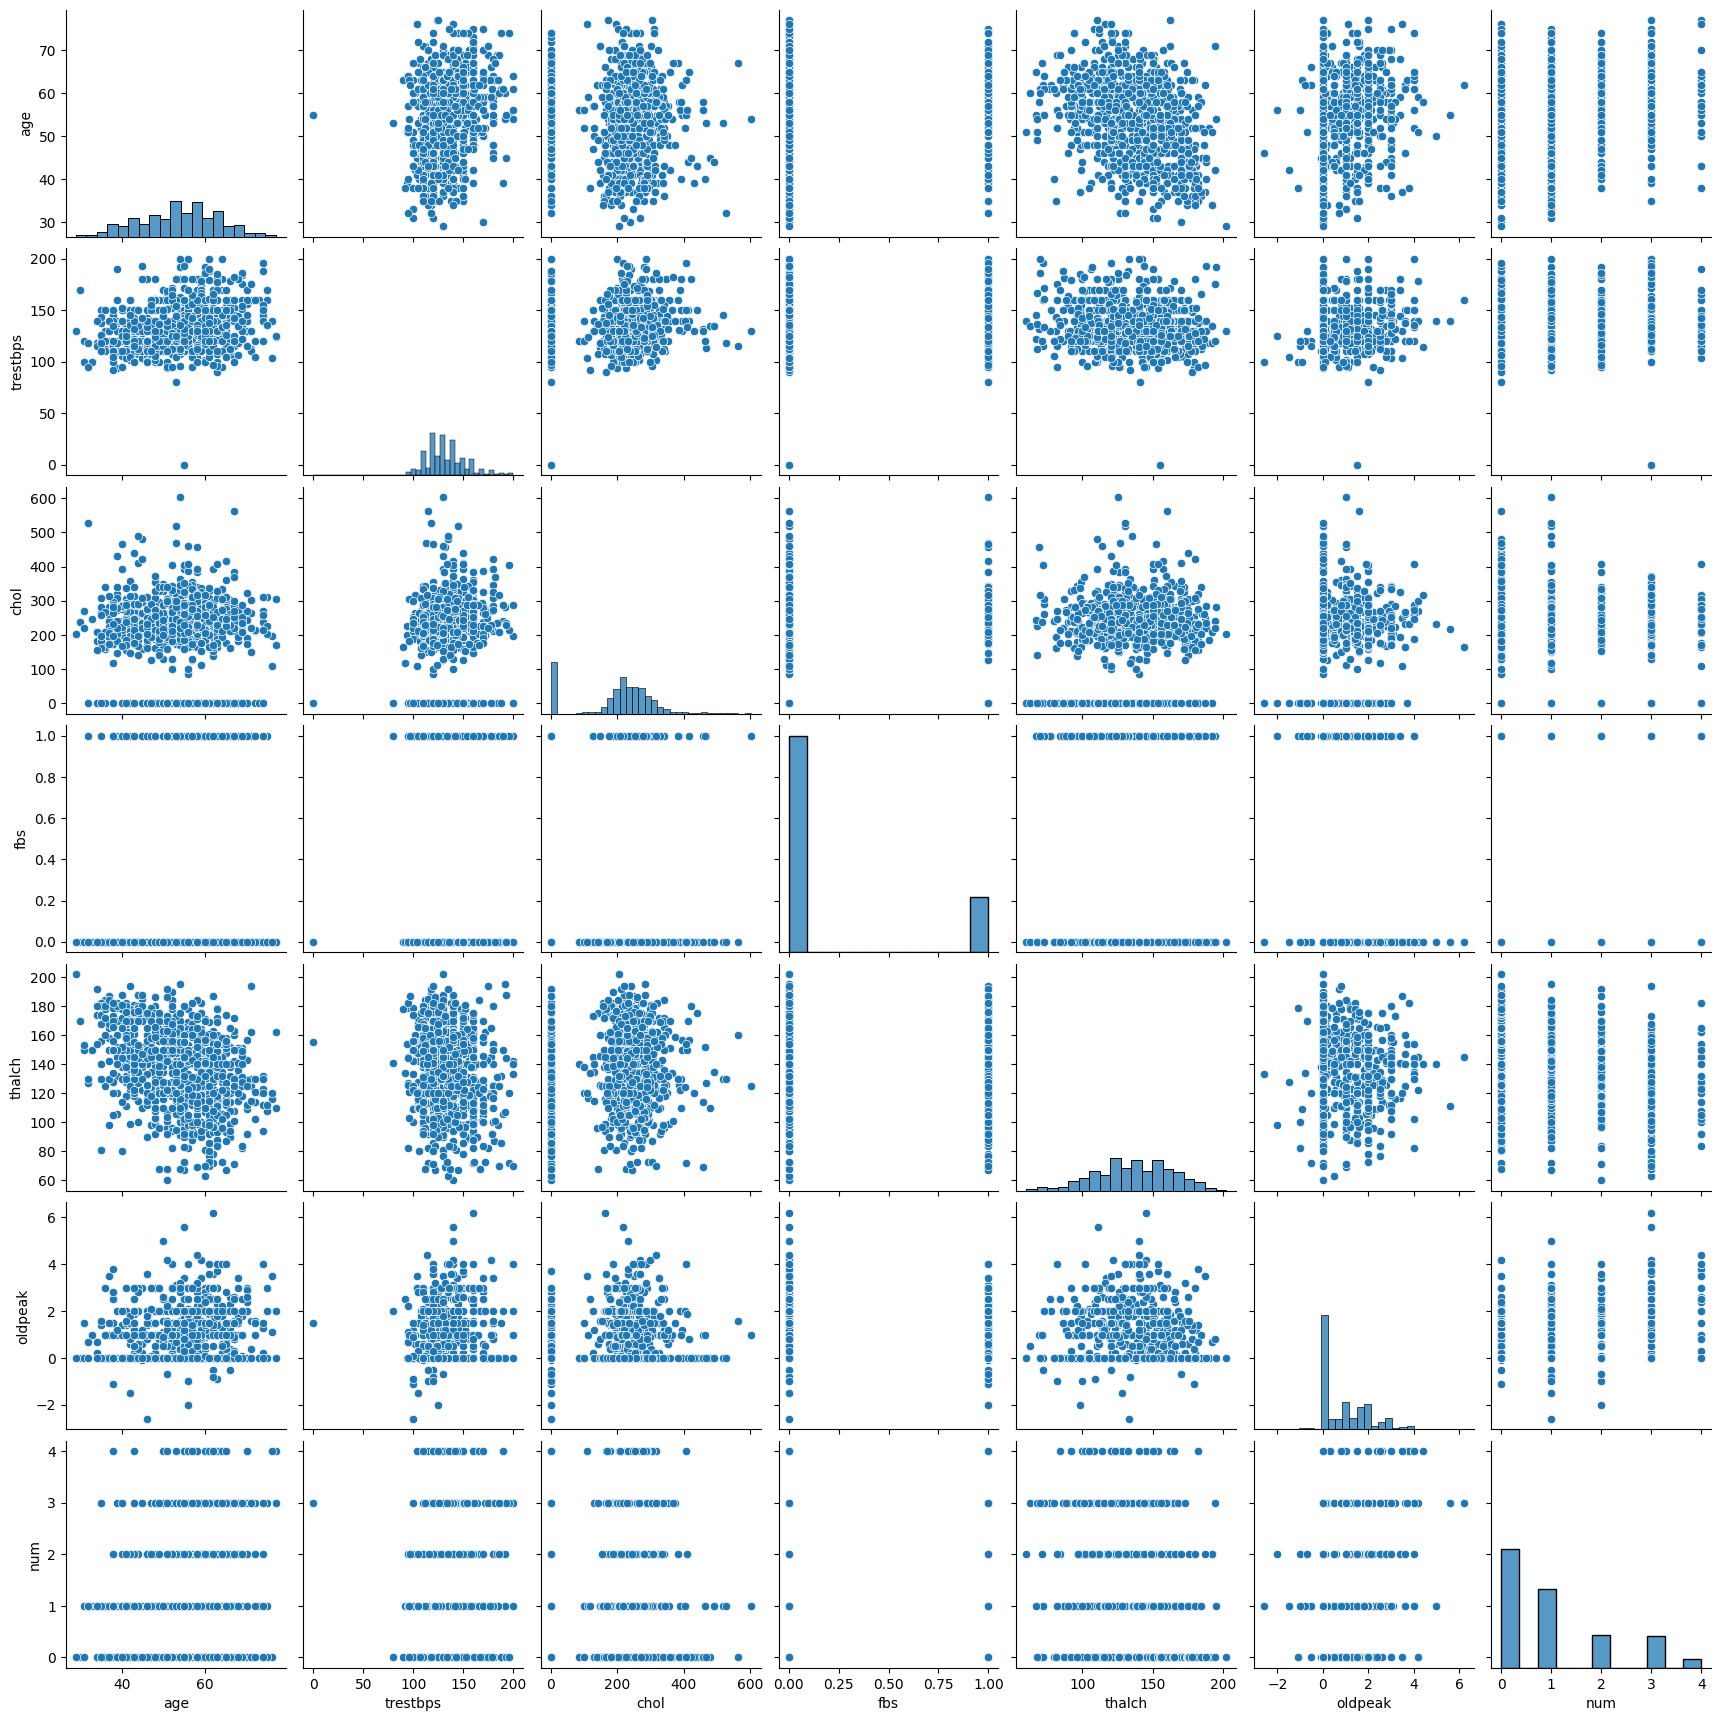

In [9]:
sns.pairplot(heart_disease_df)



## **Data Preprocessing:**

In [10]:
from sklearn.preprocessing import LabelEncoder


In [11]:
cat_cols = ['sex', 'cp', 'restecg', 'exang','slope', 'thal']


In [12]:
# Encoding categorical features
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    heart_disease_df[col] = le.fit_transform(heart_disease_df[col].astype(str))
    label_encoders[col] = le

In [13]:
# Handle missing values in 'oldpeak'
heart_disease_df['oldpeak'].fillna(heart_disease_df['oldpeak'].median(), inplace=True)

<ipython-input-13-c3adc2c217a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_disease_df['oldpeak'].fillna(heart_disease_df['oldpeak'].median(), inplace=True)


In [14]:
#  Outlier handling function
def handle_outliers(df, columns):
    for col in columns:
        z = np.abs(stats.zscore(df[col]))
        df = df[(z < 3)]
    return df

# Remove outliers from numerical columns
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
heart_disease_df = handle_outliers(heart_disease_df, num_cols)


In [15]:
heart_disease_df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [16]:
# Convert 'exang' and 'fbs' to boolean and then to integer
heart_disease_df['fbs'] = heart_disease_df['fbs'].astype(str).str.lower().map({'true': 1, 'false': 0})
heart_disease_df['exang'] = heart_disease_df['exang'].astype(str).str.lower().map({'true': 1, 'false': 0})

In [17]:
heart_disease_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,NaN,2.3,0,0,0
1,41,1,1,135,203,0,1,132,NaN,0.0,1,0,0
2,57,1,0,140,192,0,1,148,NaN,0.4,1,0,0
3,52,1,3,118,186,0,0,190,NaN,0.0,1,0,0
4,57,1,0,110,201,0,1,126,NaN,1.5,1,0,0


In [18]:
print(heart_disease_df['fbs'].isnull().sum())


0


In [19]:
print(heart_disease_df['fbs'].head(10))

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: fbs, dtype: int64


In [20]:
print(heart_disease_df.columns.tolist())  # List all column names


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num']


In [21]:
heart_disease_df.columns = heart_disease_df.columns.str.strip()


In [22]:
print(heart_disease_df['fbs'].isnull().sum())  # Count NaN values
print(heart_disease_df['fbs'].dtype)  # Check data type

0
int64


In [23]:
heart_disease_df['fbs'] = heart_disease_df['fbs'].fillna(0).astype(int)


In [24]:
print(heart_disease_df['fbs'].unique())


[1 0]


In [25]:

heart_disease_df['fbs'] = heart_disease_df['fbs'].fillna(0).astype(int)


## **Bulding Model**


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

X = heart_disease_df.drop(columns=['num'])
y = heart_disease_df['num']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
dt  = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

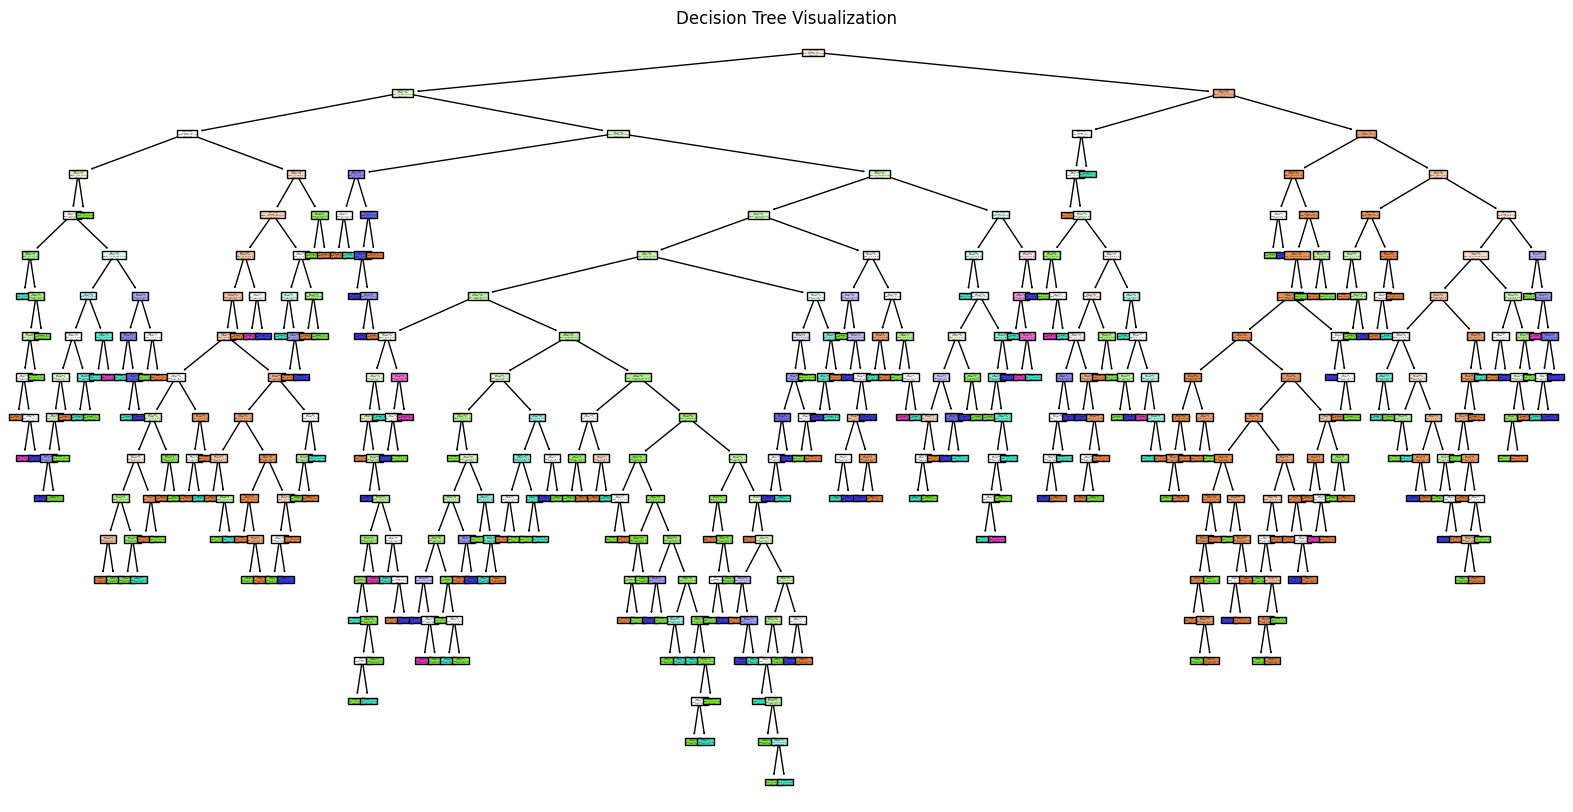

In [29]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [30]:
# Model evaluation
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [32]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75        84
           1       0.35      0.37      0.36        49
           2       0.22      0.24      0.23        17
           3       0.20      0.17      0.19        23
           4       0.00      0.00      0.00         6

    accuracy                           0.50       179
   macro avg       0.30      0.31      0.30       179
weighted avg       0.49      0.50      0.49       179



## **Hyperparameter Tuning**


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [35]:
# Initialize classifier
dt = DecisionTreeClassifier(random_state=42)

In [36]:
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [37]:
# Get best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [42]:
# improved accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Improved Accuracy:", accuracy)


Improved Accuracy: 0.5642458100558659


In [43]:

report = classification_report(y_test, y_pred)


In [41]:
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77        84
           1       0.40      0.51      0.45        49
           2       0.25      0.06      0.10        17
           3       0.33      0.04      0.08        23
           4       0.00      0.00      0.00         6

    accuracy                           0.56       179
   macro avg       0.33      0.30      0.28       179
weighted avg       0.50      0.56      0.50       179



# **Interview Questions**:
1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
- Common hyperparameters of decision tree models include max_depth, which controls tree growth to prevent overfitting, min_samples_split and min_samples_leaf, which determine the minimum samples required for splitting and leaf nodes to reduce complexity, criterion (gini or entropy), which affects how the tree decides splits, and max_features, which limits the number of features considered at each split to improve generalization.
--------------------------------------------------------------------------
2.What is the difference between the Label encoding and One-hot encoding?
- Label encoding assigns a unique numerical value to each category, which is useful for ordinal data, whereas one-hot encoding creates separate binary columns for each category, preventing misinterpretation and being more suitable for nominal data.